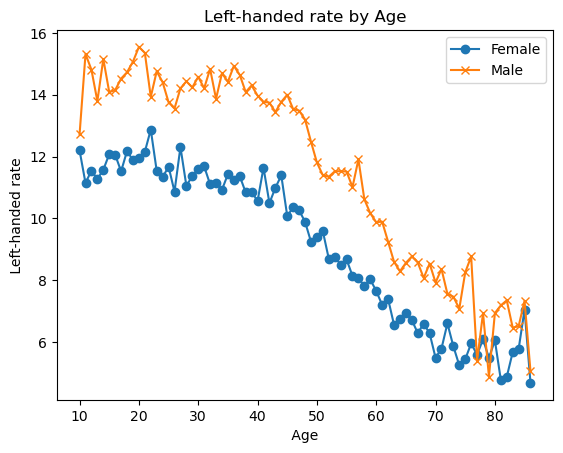

In [11]:
#Task1: Creating scatter plot for left-handed by age
fig, ax = plt.subplots()
ax.plot('Age', 'Female', data = lefthanded_data, marker = 'o')
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x')
ax.legend()
ax.set_xlabel(' Age ')
ax.set_ylabel(' Left-handed rate ')
plt.title('Left-handed rate by Age')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

In [13]:
#Task2 : Plotting mean as the function of birth year
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis=1)

fig, ax = plt.subplots()
ax.plot('Birth_year','Mean_lh', data=lefthanded_data)
ax.set_xlim(1890,1990)

(1890.0, 1990.0)

In [15]:
ax.set_ylim(4,15)

(4.0, 15.0)

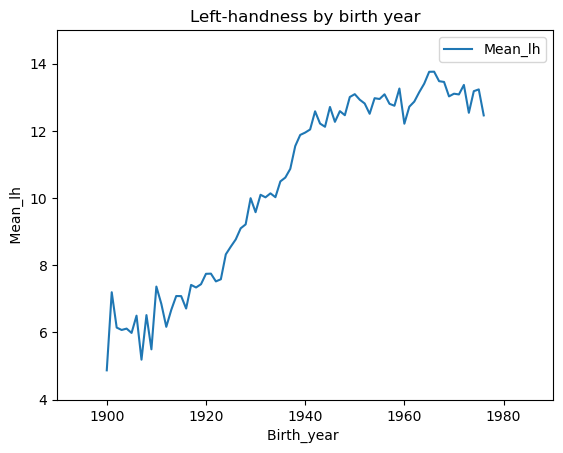

In [17]:
ax.legend()
ax.set_xlabel('Birth_year ')
ax.set_ylabel(' Mean_lh ')
plt.title('Left-handness by birth year')
plt.show()

In [19]:
#Task3 : Creating a function that will return P(LH | A) for particular ages of death in a given study year
import numpy as np
def P_lh_given_A(ages_of_death, study_year = 1990):

    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean() 
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10
    oldest_age = study_year - 1986 + 86
    
    P_return = np.zeros(ages_of_death.shape)
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

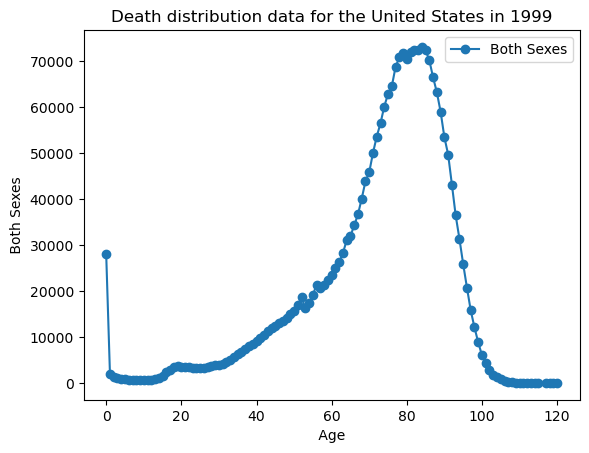

In [23]:
#Task4 : Loading death distribution data for the United States and plotting it.
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

death_distribution_data = death_distribution_data.dropna(subset = ['Both Sexes'])

fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o') 
ax.legend()
plt.title('Death distribution data for the United States in 1999')
ax.set_xlabel(' Age ') 
ax.set_ylabel(' Both Sexes ')
plt.show()

In [51]:
#Task5 : Creating a function called P_lh() which calculates the overall probability of left-handedness in thepopulation for a given study year.
def P_lh(death_distribution_data, study_year = 1990):
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year) 
    p = np.sum(p_list)
    return p / np.sum(death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07766387615350638


In [53]:
#Task6 : Writing a function to calculate P_A_given_lh().
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year)
    P_lh_A = P_lh_given_A(ages_of_death, study_year) 
    return P_lh_A*P_A/P_left


In [29]:
#Task7 : Writing a function to calculate P_A_given_rh().

def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year)
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year)
    return P_rh_A*P_A/P_right


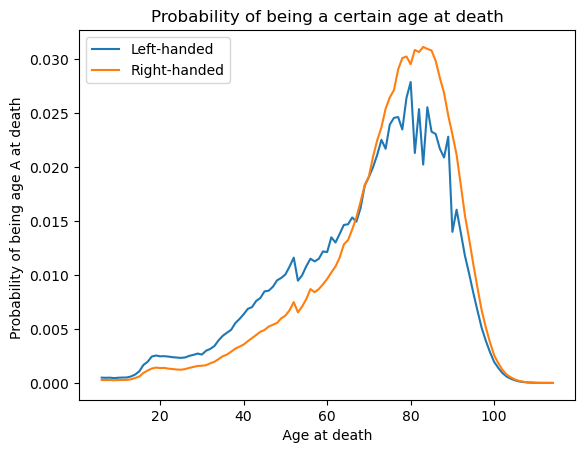

In [39]:
#Task8 : Plotting the probability of being a certain age at death given that you're left- or right-handed for a rangeof ages.
ages = np.arange(6, 115, 1)

left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = 'Right-handed')
ax.legend()
plt.title('Probability of being a certain age at death')
ax.set_xlabel(" Age at death ")
ax.set_ylabel("Probability of being age A at death ")
plt.show()

In [45]:
#Task9 : Finding the mean age at death for left-handers and right-handers.
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

print("Average age of lefthanded is: " + str(average_lh_age))

print("Average age of righthanded is: " + str(average_rh_age))

print("The difference in average ages is: " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

Average age of lefthanded is: 67.24503662801027
Average age of righthanded is: 72.79171936526477
The difference in average ages is: 5.5 years.


In [49]:
#Task10 : Redo the calculation from Task 8, setting the study_year parameter to 2018.
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.
